# STAT207 Mini-Project #2 - Predicting Weight based on Obesity Dataset


Roqaya Elmenshawy

In [1918]:
#Imports here
import pandas as pd                    
import matplotlib.pyplot as plt        
import seaborn as sns                 
sns.set()  

## 1. Introduction

The research question that I intend to answer in the report is "How do explanatory variables like Height, Age, vegetable servings eaten per day, litres of water drank per day, and hours of exercise per week, help predict the numerical response variable Weight (Weight_kg) for new datasets?". The primary research goal is to build a predictive model that will effectively predict Weight_kg for new datasets. The motivation for why I am seeking to answer this particular research question is because being a data science major interested in health analytics, I am interested to see how factors affect Weight, because we are taught to control such factors to control our weight, but different bodies behave differently, so it's important to understand to what extent these factors actually interact with someone's weight. The secondary research goal is to build a model that will yield reliable interpretative insights about the nature of the relationship between these variables (Weight_kg, Height_meters, Age, vegetables_per_day, litres_of_water_daily, hours_physical_activity_weekly) in the dataset. My guess is that the higher the Height, Age, and the lower the vegetables_per_day, litres_of_water_daily and hours_physical_ctivity_weekly, the higher will be the Weight_kg, because having height and age be high will naturally make someone weight more and not exercising enough, not drinking enough water, and not eating enough vegetable servings per day is unhealthy and could contribute to weight gain. The motivation for why someone might want to build a predictive model that predicts Weight_kg for new datasets because they might not have recent data but want to see how such variables help predict Weight_kg, which they should want to predict because by predicting weight, such models can help healthcare professionals or fitness experts offer personalized advice for individuals, guiding them towards healthier weight goals based on their unique characteristics such as age, height, activity level, and diet. One type of person who may find the answers to this research question useful is a personal trainer who specializes in weight gain or weight loss. He might USE the answers to this research question to determine a window for how much a person should exercise, and how much vegetable servings and water their client should consume to reach their goal weight, while making sure that weight is still healthy considering their height and age.

## 2. Dataset Discussion

I chose this data set which is about Estimation of Obesity Levels Based On Eating Habits and Physical Condition. I found it in the UC Irvine Machine Learning Repository that was included in the project description on Canvas. Here is the link for the dataset: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition. I downloded this file on Thursday, February 20th when I was doing Mini Project 1, and I didn't end up using it but I still kept it on hand in case I wanted to use it for Mini Project 2. The rows in this dataset represent each individual, and there are 2111 rows. 

In [1919]:
df = pd.read_csv('obesity_dataset.csv')[['Age', 'Weight_kg', 'Height_meters', 'vegetables_per_day', 'litres_of_water_daily', 'hours_physical_activity_weekly']]
df.head()

,Age,Weight_kg,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
0,21.0,64.0,1.62,2.0,2.0,0.0
1,21.0,56.0,1.52,3.0,3.0,3.0
2,23.0,77.0,1.80,2.0,2.0,2.0
3,27.0,87.0,1.80,3.0,2.0,2.0
4,22.0,89.8,1.78,2.0,2.0,0.0


In [1920]:
df.shape[0]

2111

There are 2111 rows in this dataset.

## 3. Dataset Cleaning

There are no implicit or explicit missing values. All the values that are numerical either say float64 or int64, which we found with df.dtypes and we don't have any categorical variables. When I did df.isna.sum(), I could tell that there no NaN missing values that are in the default. When I did df.dropna(), no rows were dropped, which means there are no missing values. The df.dropna() makes sure to eliminate all rows with missing values. However, it has to be overridden in order to be saved in the dataframe.

The df.dtypes function is helpful because it shows us that string values are object and numerical values are int64 or float64 (all our variables because they're numerical), which is good because, for example, if a numerical value shows as an object, we know that there is a missing value out there that we need to spot or a string that represents an implicit missing value. The df.dtypes function works very well with the df.dropna() function because it gives us a hint there is a non-default missing value if no rows were dropped after using df.dropna(). Not having any missing values we have to account for is great and should make the results of our analysis good.

In [1921]:
df

,Age,Weight_kg,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
0,21.000000,64.000000,1.620000,2.0,2.000000,0.000000
1,21.000000,56.000000,1.520000,3.0,3.000000,3.000000
2,23.000000,77.000000,1.800000,2.0,2.000000,2.000000
3,27.000000,87.000000,1.800000,3.0,2.000000,2.000000
4,22.000000,89.800000,1.780000,2.0,2.000000,0.000000
...,...,...,...,...,...,...
2106,20.976842,131.408528,1.710730,3.0,1.728139,1.676269
2107,21.982942,133.742943,1.748584,3.0,2.005130,1.341390
2108,22.524036,133.689352,1.752206,3.0,2.054193,1.414209
2109,24.361936,133.346641,1.739450,3.0,2.852339,1.139107


In [1922]:
df.dtypes

Age                               float64
Weight_kg                         float64
Height_meters                     float64
vegetables_per_day                float64
litres_of_water_daily             float64
hours_physical_activity_weekly    float64
dtype: object

In [1923]:
df.isna().sum()

Age                               0
Weight_kg                         0
Height_meters                     0
vegetables_per_day                0
litres_of_water_daily             0
hours_physical_activity_weekly    0
dtype: int64

In [1924]:
initialLen = df.shape[0]
initialLen

2111

In [1925]:
df = df.dropna()
df

,Age,Weight_kg,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
0,21.000000,64.000000,1.620000,2.0,2.000000,0.000000
1,21.000000,56.000000,1.520000,3.0,3.000000,3.000000
2,23.000000,77.000000,1.800000,2.0,2.000000,2.000000
3,27.000000,87.000000,1.800000,3.0,2.000000,2.000000
4,22.000000,89.800000,1.780000,2.0,2.000000,0.000000
...,...,...,...,...,...,...
2106,20.976842,131.408528,1.710730,3.0,1.728139,1.676269
2107,21.982942,133.742943,1.748584,3.0,2.005130,1.341390
2108,22.524036,133.689352,1.752206,3.0,2.054193,1.414209
2109,24.361936,133.346641,1.739450,3.0,2.852339,1.139107


In [1926]:
initialLen - df.shape[0]

0

## 4. Preliminary Analysis

According to the fitted values vs residuals plot below, there is an even distribution of positive and negative residuals, so a linear regression model is appropriate to predict the relationship between our response variable Weight_kg and our explanatory variables; our response variable is also numerical so the linearity assumption passes. For this reason, we don't need to transform any variables. We don't have any categorical variables in our analysis so we don't need to use interaction terms or observe such relationships between numerical and categorical variables with the response variable.


Also, we don't need to transform any variables because they all have very little to no correlation with each other, and none of them have a pattern that if we take the square root or the log of that it will make our graphs or relationships look more linear. Also, it already its fit the linearity assumption so no need to transform any variables.

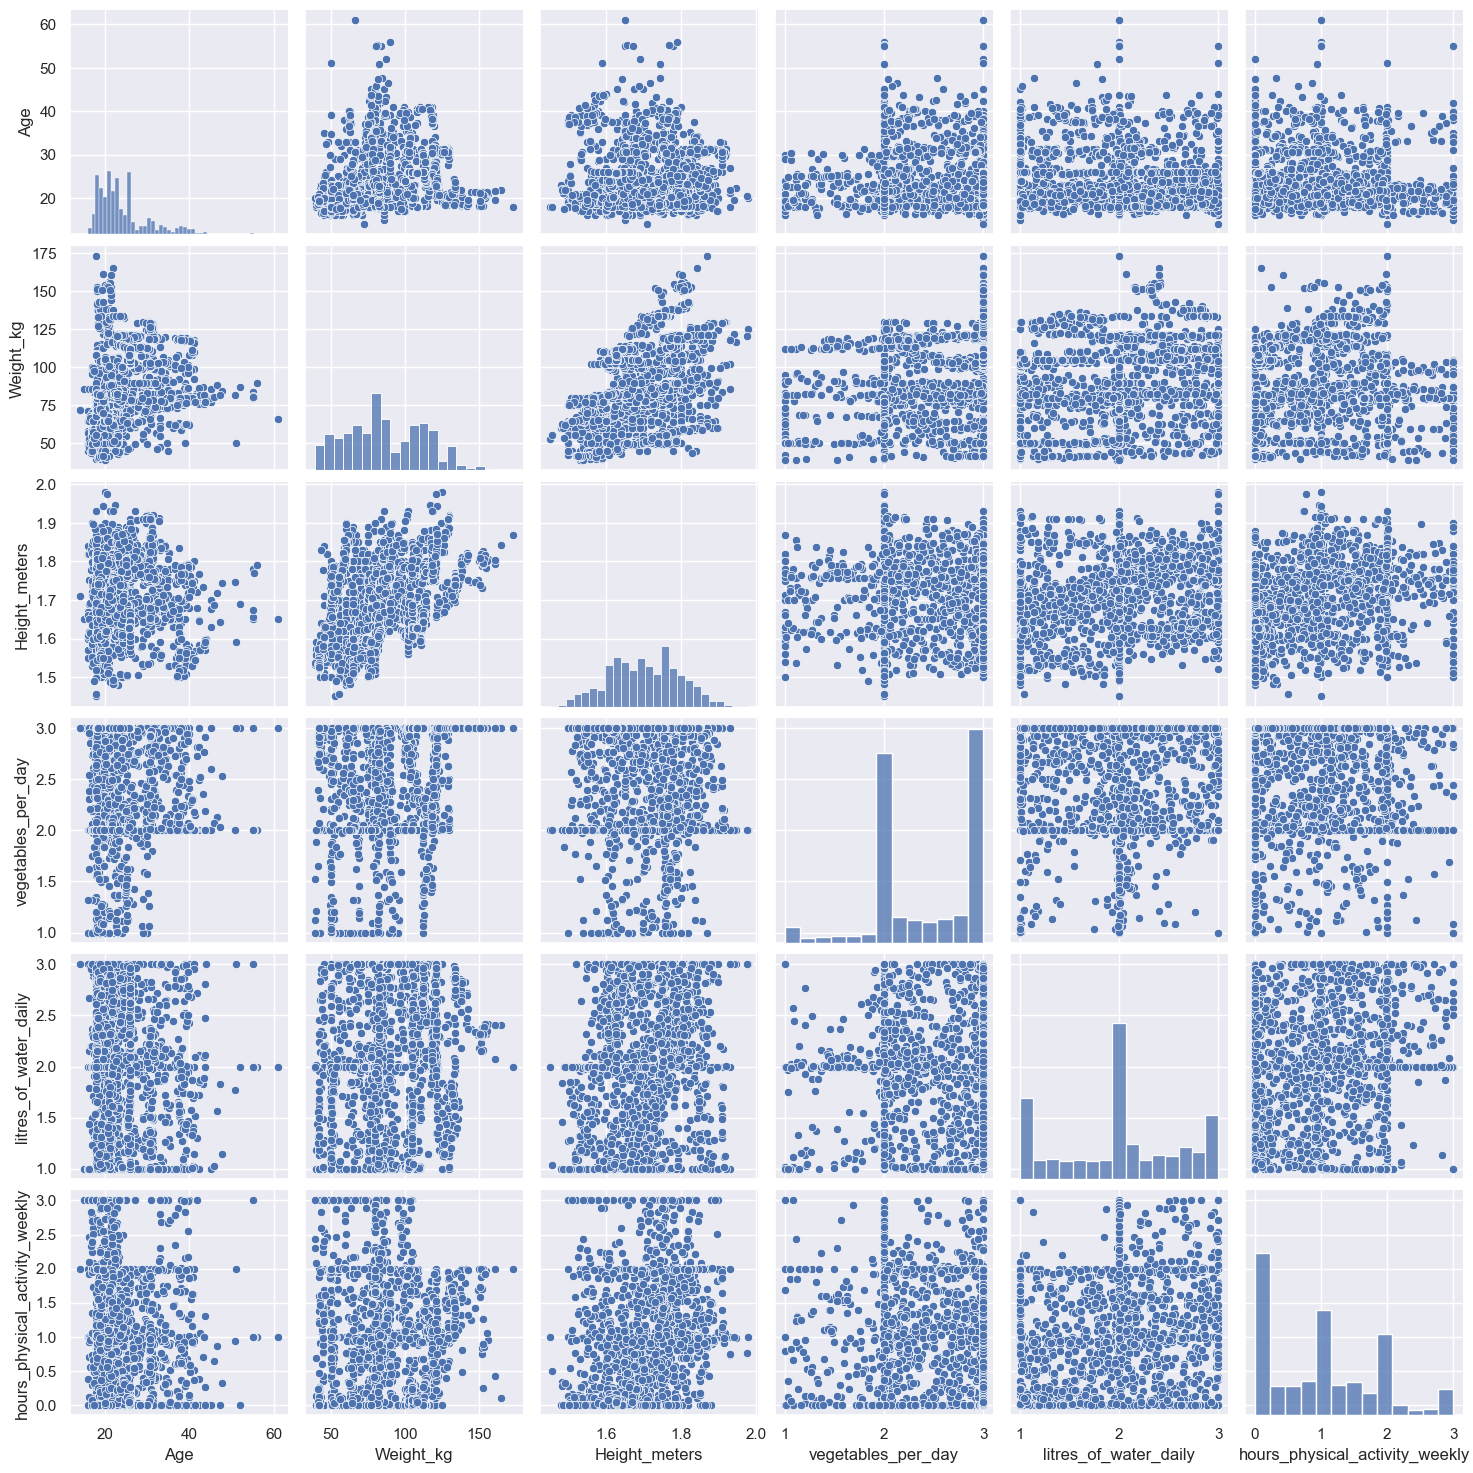

In [1927]:
sns.pairplot(df)

In [1928]:
import statsmodels.formula.api as smf
full_model = smf.ols(formula='Weight_kg~Height_meters+Age+hours_physical_activity_weekly+litres_of_water_daily+vegetables_per_day', data=df).fit()

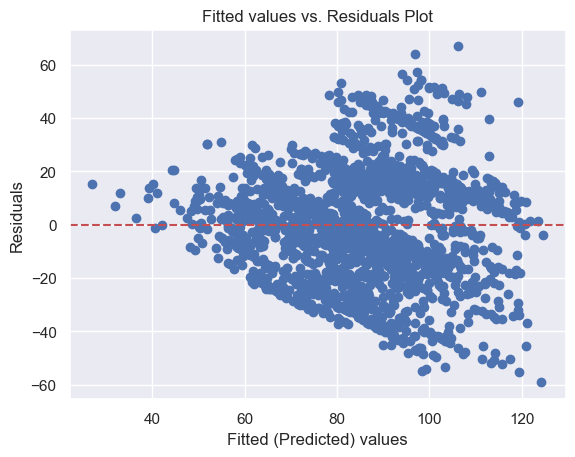

In [1929]:
plt.scatter(full_model.fittedvalues,full_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

## 5. Predictive Models

For part 5, I did a train-test split and split df_train and df_test into target arrays and features matrices. I scaled the training features matrix and test features matrix so all observations for the explanatory variables are in z-scores. Then, I trained a nonregularlized linear regression model, and got the test R^2 score of 0.33812221704029466. After that, I used the backwards elimination method, where I started with the full model using all 5 explanatory variables (Age, Height_meters, vegetables_per_day, litres_of_water_daily, and hours_physical_activity_weekly) and observed its test R^2 and removed one variable in the test model each time and observed the test R^2. Removing any of these explanatory variables only made our test R^2 decrease, so we could not eliminate them, because all of the explanatory variables together yielded the highest test R^2 (0.3381222170402989), so our full model was the best model for predict Weight_kg.

In [1930]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8, random_state=207)

In [1931]:
#Training Features Matrix
X_train = df_train.drop(['Weight_kg'],axis=1)
X_train.head()

,Age,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
556,18.000000,1.781543,2.052932,2.000000,0.520408
205,23.000000,1.600000,2.000000,2.000000,1.000000
438,19.000000,1.670000,3.000000,2.000000,2.000000
1224,22.754646,1.734237,2.000000,2.287248,2.669179
1924,21.704699,1.787614,3.000000,2.531456,1.980738


In [1932]:
#Test Features Matrix
X_test = df_test.drop(['Weight_kg'],axis=1)
X_test.head()

,Age,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
1560,25.300208,1.765258,1.562804,2.075493,1.553734
67,23.000000,1.650000,2.000000,2.000000,0.000000
2056,26.000000,1.624099,3.000000,2.523793,0.000000
789,37.218161,1.593894,2.374640,2.000000,2.892922
492,45.000000,1.700000,3.000000,1.000000,0.000000


In [1933]:
#Training Target Array
y_train = df_train['Weight_kg']
y_train.head()

556      50.869704
205      78.000000
438      64.000000
1224     95.000000
1924    137.858254
Name: Weight_kg, dtype: float64

In [1934]:
#Test Target Array
y_test = df_test['Weight_kg']
y_test.head()

1560    114.330023
67       95.000000
2056    109.978402
789      63.320629
492      86.000000
Name: Weight_kg, dtype: float64

In [1935]:
#scaling training features matrix
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(X_train)
X_train = pd.DataFrame(scaled_expl_vars, columns=X_train.columns)
X_train.head()

,Age,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
0,-0.986343,0.844800,-0.695447,-0.025853,-0.579586
1,-0.195573,-1.082373,-0.795301,-0.025853,-0.015877
2,-0.828189,-0.339286,1.091157,-0.025853,1.159515
3,-0.234377,0.342623,-0.795301,0.444234,1.946063
4,-0.400430,0.909247,1.091157,0.843885,1.136874


In [1936]:
#scaling test features matrix
scaled_expl_vars1 = scaler_training.transform(X_test)
X_test = pd.DataFrame(scaled_expl_vars1, columns=X_test.columns)
X_test.head()

,Age,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
0,0.168215,0.671927,-1.620053,0.097693,0.634977
1,-0.195573,-0.551597,-0.795301,-0.025853,-1.191269
2,0.278889,-0.826549,1.091157,0.831345,-1.191269
3,2.053087,-1.147191,-0.088559,-0.025853,2.209048
4,3.283817,-0.020821,1.091157,-1.662372,-1.191269


In [1937]:
#nonregularized linear regression model
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [1938]:
#test r^2 for nonregularized linear regression model
lin_reg_model.score(X_test,y_test)

0.33812221704029466

In [1939]:
#backwards elimination full model
import statsmodels.formula.api as smf
full_model = smf.ols(formula='Weight_kg~Height_meters+Age+hours_physical_activity_weekly+litres_of_water_daily+vegetables_per_day', data=df_train).fit()
from sklearn.metrics import r2_score
y_test = df_test['Weight_kg']
y_pred_test = full_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.3381222170402989

In [1940]:
full_model.rsquared_adj

np.float64(0.359477686512539)

In [1941]:
#remove Height_meters
test_model = smf.ols(formula='Weight_kg~Age+hours_physical_activity_weekly+litres_of_water_daily+vegetables_per_day', data=df_train).fit()
y_test = df_test['Weight_kg']
y_pred_test = test_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.08765626786786485

In [1942]:
test_model.rsquared_adj

np.float64(0.13484430715915918)

In [1943]:
#remove Age
test_model = smf.ols(formula='Weight_kg~Height_meters+hours_physical_activity_weekly+litres_of_water_daily+vegetables_per_day', data=df_train).fit()
y_test = df_test['Weight_kg']
y_pred_test = test_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.2946042949084241

In [1944]:
test_model.rsquared_adj

np.float64(0.3272137179448632)

In [1945]:
#remove hours_physical_activity_weekly
test_model = smf.ols(formula='Weight_kg~Height_meters+Age+litres_of_water_daily+vegetables_per_day', data=df_train).fit()
y_test = df_test['Weight_kg']
y_pred_test = test_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.30325596251969333

In [1946]:
test_model.rsquared_adj

np.float64(0.3248369920603321)

In [1947]:
#remove litres_of_water_daily
test_model = smf.ols(formula='Weight_kg~Height_meters+Age+hours_physical_activity_weekly+vegetables_per_day', data=df_train).fit()
y_test = df_test['Weight_kg']
y_pred_test = test_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.32965320486624095

In [1948]:
test_model.rsquared_adj

np.float64(0.3456642305509202)

In [1949]:
#remove vegetables_per_day
test_model = smf.ols(formula='Weight_kg~Height_meters+Age+hours_physical_activity_weekly+litres_of_water_daily', data=df_train).fit()
y_test = df_test['Weight_kg']
y_pred_test = test_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.304373796535382

In [1950]:
test_model.rsquared_adj

np.float64(0.30356828064941477)

stop the algorithm because removing none of our variables increased the test r^2 so none of our explanatory variables were overfitting our model.

## 6. Best Model Discussion

Our backwards elimination method showed me that the full model with all 5 explanatory variables had the highest test R^2. That is, removing any explanatory variable did not increase our test R^2. This means that none of our explanatory variables were overfitting the model so we will use all of them to predict Weight_kg. The nonregularized linear regression model also yielded about the same test R^2 as the backwards elimination full model, and they both use the same 5 explanatory variables to predict Weight_kg. Both of these models are our best model because they yield about the same test R^2. The overall fit of this "best" model for the test dataset is not quite good because the test R^2 is only 0.33812, which is not that high. Usually a model is great fit if its test R^2 is high enough where it's close to 1. None of the explanatory variables were overfitting the model, because when I tried to remove any of them, they decreased the test R^2, leading to a worse fit. All of the explanatory variables kept in our full model yielded the highest test R^2, so none of them needed to be removed, so none of them were overfitting. Also, our full model is the most parsimonious because when removed the explanatory variables, the adjusted R^2 also decreased. The adjusted R^2 was highest for the full model, making it the most parsimonious. Our best model doesn't have an issue with multicollinearity, because none of our explanatory variables have a strong linear relationship and none of them have a correlation greater than 0.7 with each other. We can easily interpret the magnitudes of the slopes as indicating how important the corresponding explanatory variable are when it comes to predicting your response variable in a linear regression model because we don't have an issue with multicollinearity. Height_meters is the most important explanatory variable because its slope magnitude is highest. Then it goes vegetables_per_day, hours_physical_activity_weekly, litres_of_water_daily, and finally Age. Age is the least important explanatory variable because its slope magnitude is the highest.

In [1951]:
#test r^2 for nonregularized linear regression model
lin_reg_model.score(X_test,y_test)

0.33812221704029466

In [1952]:
#full model backwards elimination
y_test = df_test['Weight_kg']
y_pred_test = full_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.3381222170402989

In [1953]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Weight_kg   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          6.52e-161
Time:                        21:14:15   Log-Likelihood:                -7526.8
No. Observations:                1688   AIC:                         1.507e+04
Df Residuals:                    1682   BIC:                         1.510e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -202.9972     10.029    -20.241      0.000    -222.668    -183.327
Height_meters                    140.2977      5.770     24.315      0.000     128.981     151.615
Age                                0.7550      0.082      9.261      0.000       0.595       0.915
hours_physical_activity_weekly    -6.1209      0.638     -9.593      0.000      -7.372      -4.869
litres_of_water_daily              5.2781      0.864      6.107      0.000       3.583       6.973
vegetables_per_day                11.7471      0.966     12.162      0.000       9.853      13.642
==============================================================================
Omnibus:                        2.059   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.980
Skew:                          -0.032   Prob(JB):                        0.372
Kurtosis:                       2.845   Cond. No.                         568.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{Weight_kg} = -202.9972$

$+140.2977*Height_meters$

$+0.7550*Age$

$-6.1209*hours_physical_activity_weekly$

$+5.2781*litres_of_water_daily$

$+11.7471*vegetables_per_day$

In [1954]:
X_train.corr()

,Age,Height_meters,vegetables_per_day,litres_of_water_daily,hours_physical_activity_weekly
Age,1.000000,-0.020955,0.023035,-0.031504,-0.144031
Height_meters,-0.020955,1.000000,-0.035567,0.221785,0.295499
vegetables_per_day,0.023035,-0.035567,1.000000,0.071825,0.011623
litres_of_water_daily,-0.031504,0.221785,0.071825,1.000000,0.174474
hours_physical_activity_weekly,-0.144031,0.295499,0.011623,0.174474,1.000000


## 7. Conclusion

I would not recommend my best model to be used by the personal trainer that I mentioned in my motivation because I just think the test R^2 is not high enough for him to just fully rely on the results and the insights the model provides. He should find another model that has a higher test R^2 that will help predict Weight_kg for new datasets more accurately, because if he bases his personal trainer advice based on the numbers in this model (for example, if he tells his client to exercise a certain number of hours per week), his client's Weight_kg might not accurately change and reflect in the manner the client desires, because this model is not that great at predicting Weight_kg for new datasets. I don't know FOR SURE that my chosen best model will yield the HIGHEST possible test R^2 out of all possible models that I could make with this dataset, because I didn't create a lasso model and try out different lambda values and observe which slopes become non-zero first, so I don't fully know which variables are bringing the most predictive power to the model, even though I know which variables are most important because of their slope magnitude. Also, different lambda values can lead to higher test R^2 values. However, we don't have an issue with multicollinearity in this model, so we don't really need to try a model that accounts for multicollinearity and can deal with it. A more complete analysis would do a heavy analysis on outliers and see which observations should be removed, because that could be leading to extrapolated data and inaccurate results to the overall test R^2. I think a shortcoming to my overall analysis is a lack of categorical variables that could've lead to results that make more sense. For example, Weight patterns usually behave differently according to gender and also family history, and these are variables that I did not consider. If I considered these variables, my analysis would make way more sense and I would be able to break it down more, and for the personal trainer, he would be able to create workout and diet plans for his clients based on their gender and family history, probably leading to more personalized results. Another shortcoming could also be not being able to generalize these insights because the data was collected only from South America, so it may be difficult to apply the insights on a large scale. For future work, I would want to look into a dataset that has more specific details about the individuals and categorical variables (like gender and family history of obesity) because that would help me understand how such qualitative data plays into predicting Weight_kg, because these are important variables to consider, and are scientifically known to contribute to weight changes.